# Genre Shifteration

The goal of this code is to take in a csv containing tropes and timestamps of a movie, and output a genre analogue to the Shifterator. This allows for either comparing two separate movie files, or a portion of the movie compared to another. Work is currently being done to rewrite everything as functions for ease of use and readability. 

Running this in a conda environment should work perfectly, otherwise NumPy and pandas must be installed.

This first cell is just to deal with github path issues.

In [1]:
import os
def find_repo_root(startpath):
    current_path = os.path.abspath(startpath) # Path started on
    while True:
        if os.path.isdir(os.path.join(current_path, '.git')) or os.path.isfile(os.path.join(current_path, 'README.md')): # If on git path, return it
            return current_path
        
        parent_path = os.path.dirname(current_path)

        if parent_path == current_path: # If current path is parent path, stop 
            break
        current_path = parent_path # Set current path to parent path, to check if git path again
    return None # If an issue arises 
root = find_repo_root(os.getcwd())
        

# Open movie files and create dataframes

 In this cell, the movie files are uploaded, and merged with the file containing the data from the 2020 scrape of TV Tropes. This returns dataframes that contain each trope, the associated genre values, and active time stamps based on the length of the movie. The cell after this one creates a new dataframe with rows corresponding to each second of the movie.

In [ ]:
import numpy as np
import pandas as pd
import csv 

movie_file_1 = f"{root}/Code/Alien Stuff/Alien Tropes - CodeTest.tsv" # CSV for movie one
movie_file_2 = '' # Come back to this later

movie_file_1_df = pd.read_csv(movie_file_1, delimiter = '\t')

matrix_file = f'{root}/Data/liteweight/2020_genre_counts_by_trope.csv'
matrix_df = pd.read_csv(matrix_file)
matrix_df = matrix_df[['Trope', 'Action', 'Adult', 'Adventure', 'Animation', # Drop unnamed column, not sure why .drop doesn't work, had to remove the /N (MAY CAUSE bug)
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'Associated_Movies',
       'Number_movies']]


# note - easy fix for the /N conundrum use r'/N' to deal with python syntax, small fix but should work well 

genres_ = ['Trope', 'Action', 'Adult', 'Adventure', 'Animation', # Drop unnamed column, not sure why .drop doesn't work, had to remove the /N (MAY CAUSE bug)
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western']

backup_matrix_df = matrix_df.copy() # Make backup with same syntax, keep track of the number of movies mostly


matrix_df.drop("Associated_Movies", axis = 1, inplace = True) # Get rid of this column immediately

not_tropes = matrix_df.columns.difference(['Trope']) # All columns but tropes, so that function does not apply here

matrix_df[not_tropes] = matrix_df[not_tropes].apply(lambda x: x / matrix_df['Number_movies']) # Get percentages, this might need to be checked for normalization issues
# due to dropping the /N column

matrix_df.drop('Number_movies', axis = 1, inplace = True) # remove this column

matrix_df.dropna(inplace=True) # Get rid off blank values

matrix_df.sort_values(by = 'Action') # Not entirely sure what this does, but the code does not work without it

#matrix_df.head(15)

movie_file_1_df['Trope'] = movie_file_1_df['Trope'].apply(lambda x: x.replace(" ", '')) # Punctuation
movie_file_1_df = movie_file_1_df.merge(right = matrix_df, on = 'Trope', how = 'left') # Stick dataframes together
movie_file_1_df = movie_file_1_df.drop('Rough Occurence in movie', axis = 1) # Descriptions are nnecessary FOR NOW
movie_file_1_df = movie_file_1_df.dropna() # Drop NaN values, but maybe should be saved somewhere

tau_ = 600 # Define trope decay, should be included as a variable in a function

end_second = movie_file_1_df['End Time'].max() # Find end time

movie_file_1_df['Active Seconds'] = movie_file_1_df.apply(lambda row: set(range(row['Start Time'], min(row['End Time'] + tau_, end_second))), axis=1) # Make row with active seconds unless it goes past end of movie

movie_file_1_df.head(5)












,Trope,Inverted?/Defied?,Averted/Subverted?,Background?,Setups?,Start Time,End Time,Total Time,Action,Adult,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Active Seconds
0,ActionSurvivor,No,No,Yes,No,0,7014,7014,0.536145,0.0,...,0.090361,0.0,0.024096,0.192771,0.006024,0.0,0.313253,0.018072,0.012048,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,AdmiringTheAbomination,No,No,No,No,5162,5162,7014,0.433333,0.0,...,0.100000,0.0,0.000000,0.633333,0.000000,0.0,0.300000,0.000000,0.033333,"{5162, 5163, 5164, 5165, 5166, 5167, 5168, 516..."
2,AIIsACrapshoot,No,No,No,No,5130,5130,7014,0.534884,0.0,...,0.046512,0.0,0.011628,0.697674,0.023256,0.0,0.197674,0.000000,0.000000,"{5130, 5131, 5132, 5133, 5134, 5135, 5136, 513..."
4,AlienBlood,No,No,No,No,2373,2462,7014,0.539683,0.0,...,0.063492,0.0,0.000000,0.634921,0.015873,0.0,0.142857,0.000000,0.000000,"{2373, 2374, 2375, 2376, 2377, 2378, 2379, 238..."
5,AlienSky,No,No,No,No,1434,1440,7014,0.540541,0.0,...,0.162162,0.0,0.054054,0.594595,0.000000,0.0,0.135135,0.000000,0.000000,"{1434, 1435, 1436, 1437, 1438, 1439, 1440, 144..."


In [ ]:
def make_time_series(df): # Make empty dataframe and then give a time column that counts from 0 till end of movie 
    time_df = pd.DataFrame()
    times = range(0, end_second)
    time_df['Time'] = times
    #time_df['Active Tropes'] = [0] * len(times)
    #for index, row in df.iterrows():
        #trope = row['Trope']
        #active_seconds = row['Active Seconds']

        
    #for trope in df['Trope']:
    return time_df    

time_df = make_time_series(movie_file_1_df)
time_df.head(5)

,Time
0,0
1,1
2,2
3,3
4,4


In [ ]:
def restructure(df1, df2): # This can be ignored, the code is helpful in getting the Trope column to stay as lists, but doesn't work with genre
    # Step 1: Explode the "Active Times" column
    df1_exploded = df1.explode('Active Seconds')

    # Step 2: Merge with df2 on the time column
    merged_df = df2.merge(df1_exploded, left_on='Time', right_on='Active Seconds', how='left')

    # Step 3: Group by time and aggregate names
    result = merged_df.groupby('Time')['Trope'].agg(lambda x: ', '.join(x.dropna())).reset_index()
    
    return result

test = restructure(movie_file_1_df, time_df)

test.head()







,Time,Trope
0,0,"ActionSurvivor, AnyoneCanDie, AsYouKnow, Audie..."
1,1,"ActionSurvivor, AnyoneCanDie, AsYouKnow, Audie..."
2,2,"ActionSurvivor, AnyoneCanDie, AsYouKnow, Audie..."
3,3,"ActionSurvivor, AnyoneCanDie, AsYouKnow, Audie..."
4,4,"ActionSurvivor, AnyoneCanDie, AsYouKnow, Audie..."


# More data wrangling
Here we take all three dataframes (uploaded csv, matrix file, empty df with rows for each second), and combine them into one dataframe. This is mostly for plotting time series, and could be used for comparative time series, but otherwise does not fit into the shifterator (yet).

In [ ]:
def restructure2(df1, df2, df3):  # This is mostly from ChatGPT, so documentation might not be great

    #df1 is the movie csv, df2 is the structured time series df, and df3 is the matrix
    
    df1 = df1[['Trope', 'Active Seconds']] # Fix the movie_file_df so that it merges properly
    
    
    # Step 1: Explode 'Active Times' to distribute times across rows
    df1_exploded = df1.explode('Active Seconds').reset_index(drop=True)

    # Step 2: Merge df1_exploded (Active Times and Names) with df3 (Scalar Values)
    df1_with_values = df1_exploded.merge(df3, on='Trope', how='left')

    # Step 3: Merge with df2 to align times with active names and values
    merged_df = df2.merge(df1_with_values, left_on='Time', right_on='Active Seconds', how='left')


    # Step 4: Identify all value columns dynamically (excluding 'Name' and 'Time')
    value_columns = [col for col in df3.columns if col != 'Trope']

    # Step 5: Group by 'Time' and sum each value column
    final_result = merged_df.groupby('Time').agg({
    'Trope': lambda x: list(x.dropna().unique()),  # Keep as list
    **{col: 'sum' for col in genres_}  # Sum all value columns dynamically
}).reset_index()

    # Step 6: Compute row-wise normalization
    final_result['Total Value'] = final_result[value_columns].sum(axis=1)

    for col in value_columns:
        final_result[f'Normalized {col}'] = final_result[col] / final_result['Total Value']

    # Step 7: Drop the 'Total Value' column as it's not needed
    final_result = final_result.drop(columns=['Total Value'])

    result_updater = merged_df.groupby('Time')['Trope'].agg(lambda x: ', '.join(x.dropna())).reset_index() # from previous code, this just keeps the Trope column as lists

    final_result['Trope'] = result_updater['Trope'] # Replace trope column with the lists, ChatGPT's kept returning strings, this is also a list though for some reason, needs updating

    return final_result
final_df = restructure2(movie_file_1_df, time_df, matrix_df)
# Select only columns that start with 'Normalized'
normalized_columns = [col for col in final_df.columns if col.startswith("Normalized")]
normalized_columns += ['Trope', 'Time'] 
final_df = final_df[normalized_columns]
final_df['Time'] = final_df['Time'] / end_second
final_df.head()

,Normalized Action,Normalized Adult,Normalized Adventure,Normalized Animation,Normalized Biography,Normalized Comedy,Normalized Crime,Normalized Documentary,Normalized Drama,Normalized Family,...,Normalized News,Normalized Romance,Normalized Sci-Fi,Normalized Short,Normalized Sport,Normalized Thriller,Normalized War,Normalized Western,Trope,Time
0,0.123642,0.00011,0.110652,0.002949,0.011211,0.099464,0.041993,0.00452,0.124131,0.012621,...,0.0,0.018212,0.138361,0.007509,0.002142,0.071132,0.00918,0.004404,"ActionSurvivor, AnyoneCanDie, AsYouKnow, Audie...",0.000000
1,0.123642,0.00011,0.110652,0.002949,0.011211,0.099464,0.041993,0.00452,0.124131,0.012621,...,0.0,0.018212,0.138361,0.007509,0.002142,0.071132,0.00918,0.004404,"ActionSurvivor, AnyoneCanDie, AsYouKnow, Audie...",0.000143
2,0.123642,0.00011,0.110652,0.002949,0.011211,0.099464,0.041993,0.00452,0.124131,0.012621,...,0.0,0.018212,0.138361,0.007509,0.002142,0.071132,0.00918,0.004404,"ActionSurvivor, AnyoneCanDie, AsYouKnow, Audie...",0.000285
3,0.123642,0.00011,0.110652,0.002949,0.011211,0.099464,0.041993,0.00452,0.124131,0.012621,...,0.0,0.018212,0.138361,0.007509,0.002142,0.071132,0.00918,0.004404,"ActionSurvivor, AnyoneCanDie, AsYouKnow, Audie...",0.000428
4,0.123642,0.00011,0.110652,0.002949,0.011211,0.099464,0.041993,0.00452,0.124131,0.012621,...,0.0,0.018212,0.138361,0.007509,0.002142,0.071132,0.00918,0.004404,"ActionSurvivor, AnyoneCanDie, AsYouKnow, Audie...",0.000570


# Single movie comparisons
This cell is for comparing two sections of one movie. The time ranges (in terms of percentage) are selected, along with the genre for comparison. This returns the time average for each genre, which is different from the trope average; at each time stamp, the sum of all genre proportions must sum to one, thus the time average for each genre is generally quite small. Using the average genre for tropes does not have the same normalization condition, thus we use it later.

NOTE - we should find the distribution for each trope (could be interesting) and could be used to justify filtering out genres for certain calculations (e.g. if tropes follow a bell curve for 'Horror' we drop everything beyond 2 standard deviations, and these could be determined from top n genres just to deal with noise)

Due to this constraint, one way we can characterize each selection is by finding the biggest and smallest contributory tropes, but this is still much less enlightening than the shifterator.

In [369]:
# Pick time range, start percent, end percent
time_range_1 = [0, 0.5]
time_range_2 = [0.5, 1]

ref_df = final_df[(final_df['Time'] >= time_range_1[0]) & (final_df['Time'] < time_range_1[1])] # Filter out everything not in time range
comp_df = final_df[(final_df['Time'] >= time_range_2[0]) & (final_df['Time'] < time_range_2[1])]

# Pick genre
genre4comp = "Action" # This will eventually be a variable for a function
ngenre4comp = 'Normalized ' + genre4comp # Appropriate column name 
ref_df = ref_df[[ngenre4comp, 'Trope', 'Time']] # Reduce df's mostly for readability
comp_df = comp_df[[ngenre4comp, 'Trope', 'Time']]

ref_avg = np.mean(ref_df[ngenre4comp]) # These are averages over time
comp_avg = np.mean(comp_df[ngenre4comp])

print('The average ' + genre4comp + ' proportion of the reference section is ' + str(ref_avg))
print('The average ' + genre4comp + ' proportion of the comparison section is ' + str(comp_avg))

# Find set of all tropes in time range
ref_df['Trope'] = ref_df['Trope'].apply(lambda x: x.split(',')) 
comp_df['Trope'] = comp_df['Trope'].apply(lambda x: x.split(','))

The average Action proportion of the reference section is 0.1286753947074231
The average Action proportion of the comparison section is 0.1364322960183023


In [367]:
ref_tropes = [trope for tropes in ref_df['Trope'] for trope in tropes] # Create list of all tropes in Trope column
ref_tropes = [trope.replace(" ", '')for trope in ref_tropes] # Fix punctuation
ref_tropes = list(set(ref_tropes)) # Find unique tropes only

comp_tropes = [trope for tropes in comp_df['Trope'] for trope in tropes] # Create list of all tropes in Trope column
comp_tropes = [trope.replace(" ", '') for trope in comp_tropes] # Fix punctuation
comp_tropes = list(set(comp_tropes)) # Find unique tropes only

ref_matrix_df = pd.DataFrame({'Trope':ref_tropes}).sort_values(by = 'Trope') # Make new dataframes with Tropes in each section + their genre values
ref_matrix_df = ref_matrix_df.merge(matrix_df, on='Trope', suffixes=[False, False]) 

comp_matrix_df = pd.DataFrame({'Trope':comp_tropes}).sort_values(by = 'Trope')
comp_matrix_df = comp_matrix_df.merge(matrix_df, on='Trope', suffixes=[False, False])

#all_tropes = list(set(ref_tropes + comp_tropes)) 



In [ ]:
# This cell will find the most genre heavy tropes, using the biggest contributors from either time series, even if they are repeated
# These matrices are ONLY for finding biggest/smallest tropes. They are NOT for calculating shifts.

top_contributors = 5 # This should also be a variable, just how many of the biggest/smallest tropes to display

ref_top = ref_matrix_df.nlargest(top_contributors, genre4comp) # Find top contributors and store as lists for now, but can be whatever structure is most useful
ref_top_tropes = list(ref_top['Trope'])
ref_top_values = list(ref_top[genre4comp])

ref_bottom = ref_matrix_df[ref_matrix_df[genre4comp] > 0] # Filter out tropes with score of 0, we want only non-zero contributors to be plotted eventually 
ref_bottom = ref_bottom.nsmallest(top_contributors, genre4comp)
ref_bottom_tropes = list(ref_bottom['Trope'])
ref_bottom_values = list(ref_bottom[genre4comp])

comp_top = comp_matrix_df.nlargest(top_contributors, genre4comp) 
comp_top_tropes = list(comp_top['Trope'])
comp_top_values = list(comp_top[genre4comp])

comp_bottom = comp_matrix_df[comp_matrix_df[genre4comp] > 0] 
comp_bottom = comp_bottom.nsmallest(top_contributors, genre4comp)
comp_bottom_tropes = list(comp_bottom['Trope'])
comp_bottom_values = list(comp_bottom[genre4comp])


In [215]:
# This cell will do the same thing as the previous one, but does not allow repeats of tropes, also should get rid of most backgrounds
ref_matrix_df = ref_matrix_df[~ref_matrix_df['Trope'].isin(comp_matrix_df['Trope'])] # Filter out copies
comp_matrix_df = comp_matrix_df[~comp_matrix_df['Trope'].isin(ref_matrix_df['Trope'])]

top_contributors = 5 # This should also be a variable, just how many of the biggest/smallest tropes to display

ref_top = ref_matrix_df.nlargest(top_contributors, genre4comp) # Find top contributors and store as lists for now, but can be whatever structure is most useful
ref_top_tropes = list(ref_top['Trope'])
ref_top_values = list(ref_top[genre4comp])

ref_bottom = ref_matrix_df[ref_matrix_df[genre4comp] > 0] # Filter out tropes with score of 0, we want only non-zero contributors to be plotted eventually 
ref_bottom = ref_bottom.nsmallest(top_contributors, genre4comp)
ref_bottom_tropes = list(ref_bottom['Trope'])
ref_bottom_values = list(ref_bottom[genre4comp])

comp_top = comp_matrix_df.nlargest(top_contributors, genre4comp) 
comp_top_tropes = list(comp_top['Trope'])
comp_top_values = list(comp_top[genre4comp])

comp_bottom = comp_matrix_df[comp_matrix_df[genre4comp] > 0] 
comp_bottom = comp_bottom.nsmallest(top_contributors, genre4comp)
comp_bottom_tropes = list(comp_bottom['Trope'])
comp_bottom_values = list(comp_bottom[genre4comp])



In [216]:
print('The top '  + str(top_contributors) + genre4comp + ' tropes in the reference are ' + str(ref_top_tropes) + ', with values of ' + str(ref_top_values))
print('The bottom '  + str(top_contributors) + genre4comp + ' tropes in the reference are ' + str(ref_bottom_tropes) + ', with values of ' + str(ref_bottom_values))

print('The top '  + str(top_contributors) + genre4comp + ' tropes in the comparison are ' + str(comp_top_tropes) + ', with values of ' + str(comp_top_values))
print('The bottom '  + str(top_contributors) + genre4comp + ' tropes in the comparison are ' + str(comp_bottom_tropes) + ', with values of ' + str(comp_bottom_values))

The top 5Comedy tropes in the reference are ['OnlySaneWoman', 'BaitAndSwitch', 'CaptainObvious', 'JerkassHasAPoint', 'Fanservice'], with values of [0.8148148148148148, 0.45627376425855515, 0.39226519337016574, 0.3850129198966408, 0.36755386565272496]
The bottom 5Comedy tropes in the reference are ['AlienSky', 'TheNeedsOfTheMany', 'FaceFullOfAlienWingWong', 'DistressCall', 'DeathWorld'], with values of [0.05405405405405406, 0.05714285714285714, 0.09523809523809523, 0.1111111111111111, 0.13043478260869565]
The top 5Comedy tropes in the comparison are ['CuriosityKilledtheCast', 'SpaceTrucker', 'DoubleTake', 'ThoseTwoGuys', 'DoubleEntendre'], with values of [1.0, 0.6666666666666666, 0.6, 0.5540983606557377, 0.548936170212766]
The bottom 5Comedy tropes in the comparison are ['DroneOfDread', 'SoleSurvivor', 'TheDeadHaveNames', 'CosmicHorrorStory', 'SensorSuspense'], with values of [0.025, 0.04672897196261682, 0.05263157894736842, 0.06818181818181818, 0.07142857142857142]


# And finally... the Genre Shifterator!

After running the above cell to filter out all shared tropes and format the 'ref/comp_matrix' dataframes as needed, the shifts are calculated via the following formalism.

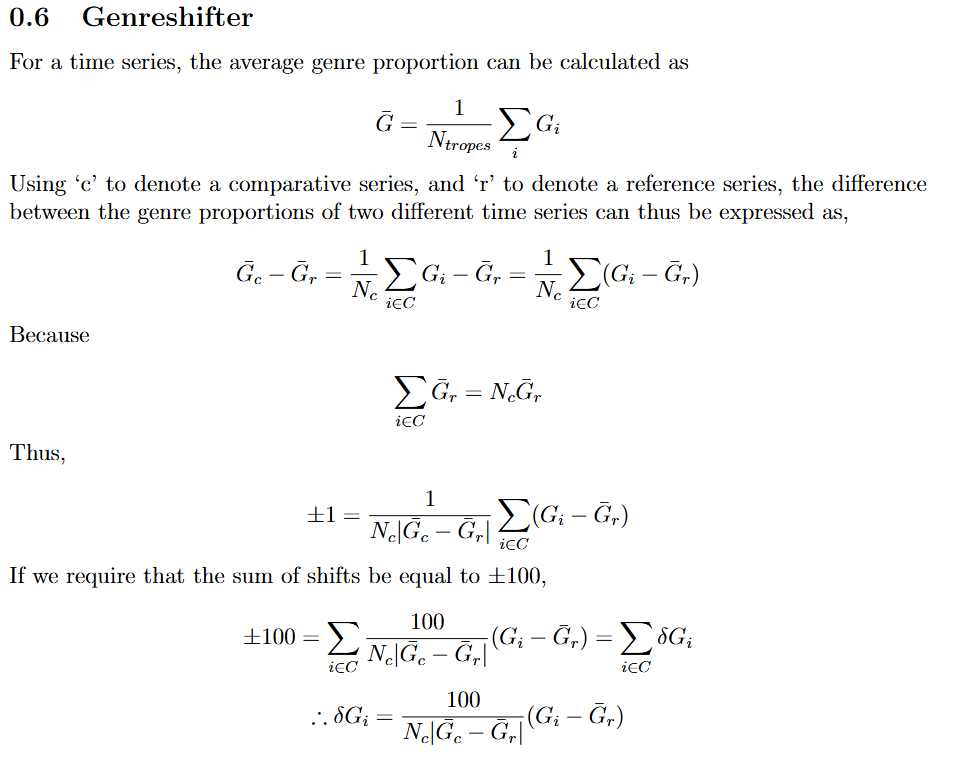

The first plot uses all the tropes from the comparison selection, but can plot any number (will be rewritten as a function).

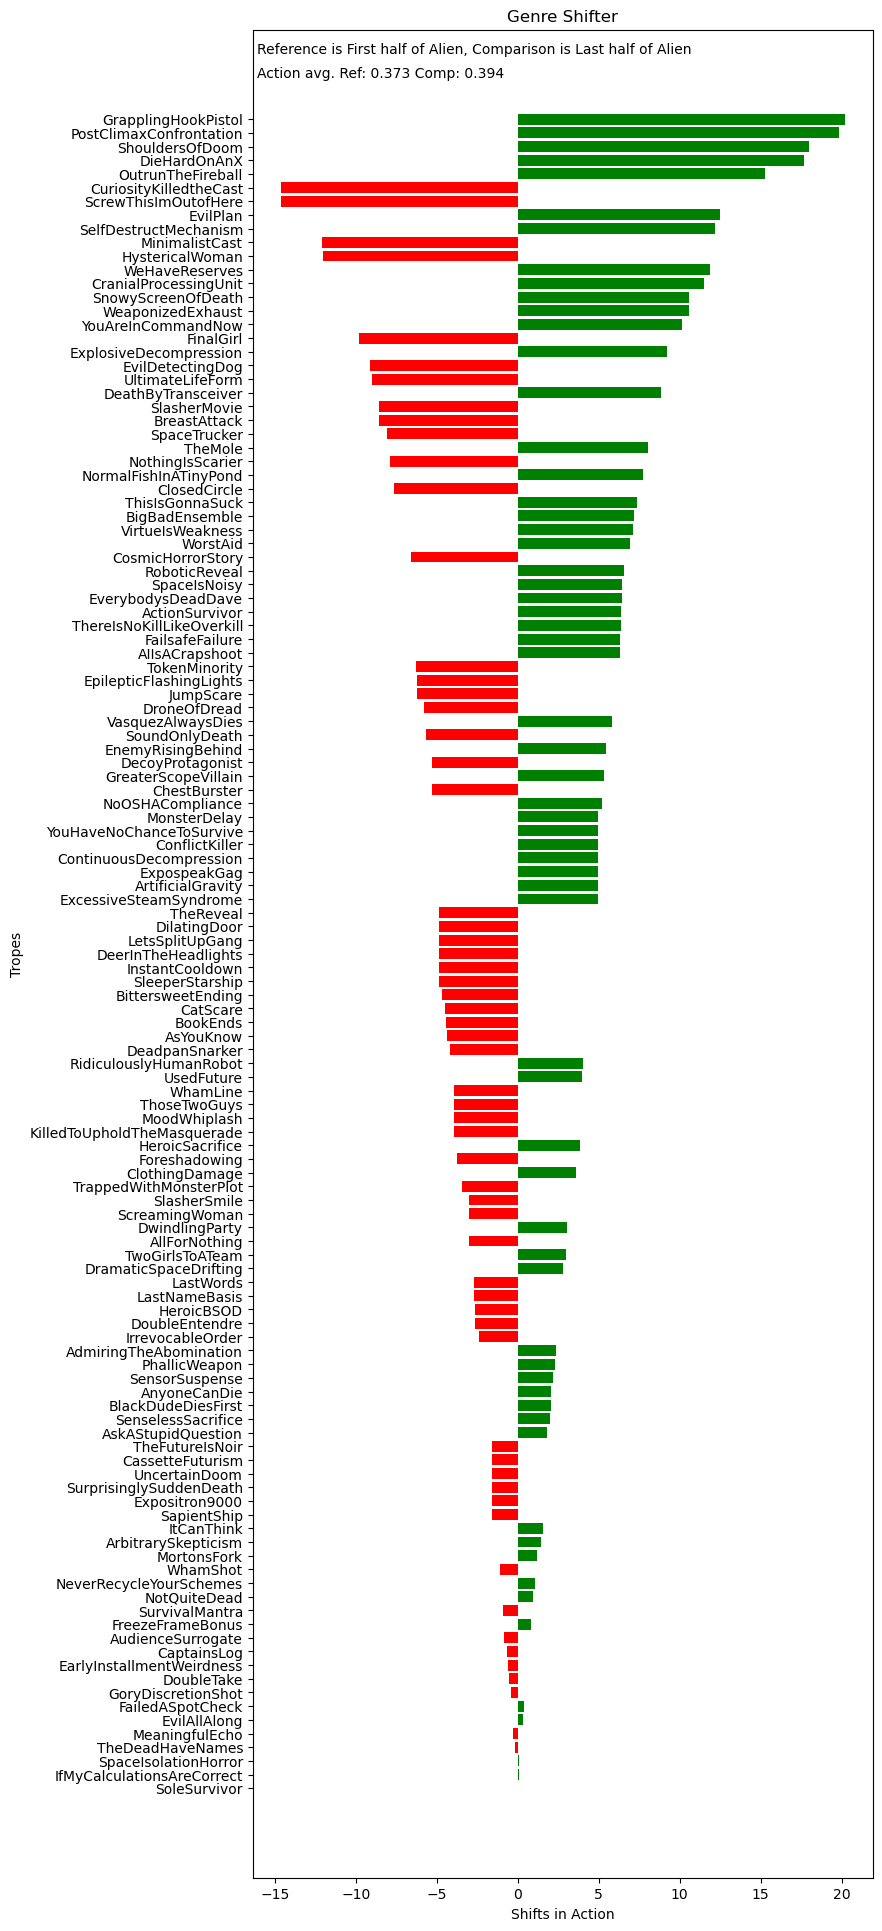

In [460]:
comp_trope_avg = np.mean(comp_matrix_df[genre4comp]) # These are the average scores of the tropes themselves, DIFFERENT from time avg
ref_trope_avg = np.mean(ref_matrix_df[genre4comp])
comp_matrix_df['Shifts'] = comp_matrix_df[genre4comp].apply(lambda x: x - ref_trope_avg)
comp_matrix_df['Shifts'] = comp_matrix_df['Shifts'].apply(lambda x : x * (100 / (len(comp_tropes) * np.abs(ref_trope_avg - comp_trope_avg)))) # Calculate shifts

import matplotlib.pyplot as plt
def plot1d(): # Plot shifts
    ref_film = 'First half of Alien'
    comp_film = 'Last half of Alien'
    shifts_df = comp_matrix_df.copy()
    shifts_df['Abs Shifts'] = shifts_df['Shifts'].apply(lambda x: np.abs(x)) # Add temporaty column with absolute values
    shifts_df = shifts_df.nlargest(len(comp_tropes), 'Abs Shifts') # Reduce df to top contributing shifts by magnitude
    shifts = list(shifts_df['Shifts'])
    tropes = list(shifts_df['Trope'])
    shifts.reverse() # Reverse for barh plot
    tropes.reverse()
    # Create the bar plot
    plt.figure(figsize=(8, 24))

    # Define colors for positive and negative values
    bar_colors = ['green' if v >= 0 else 'red' for v in shifts]

    plt.barh(tropes, shifts, color=bar_colors)

    # Add labels and title
    plt.ylabel('Tropes')
    plt.xlabel('Shifts in ' + genre4comp)
    plt.title('Genre Shifter')
    plt.figtext(0.13, 0.87, f"Reference is {ref_film}, Comparison is {comp_film}")
    plt.figtext(0.13, 0.86, f"{genre4comp} avg. Ref: {ref_trope_avg.round(3)} Comp: {comp_trope_avg.round(3)}")
    
    # Show the plot
    plt.show()
plot1d()

# Multidimensional plots

Here we calculate the top 3 genres of the comparison based on trope averages, calculate their shifts, and plot them in either 2 or 3 dimensions. 

OR finds the greatest changes in genre and returns those instead (but proportional change makes it weird)

In [470]:
# Find top genres
def find_averages():
    #genres = genres_.remove('Trope')
    ref_averages = [np.mean(ref_matrix_df[genre]) for genre in genres_] # Calculate all averages for the reference
    ref_averages_df = pd.DataFrame({'Genre':genres_, 'Averages': ref_averages})
    #ref_averages_df = ref_averages_df.nlargest(10, columns='Averages')
    comp_averages = [np.mean(comp_matrix_df[genre]) for genre in genres_] # Calculate all averages for comparison

    comp_averages_df = pd.DataFrame({'Genre':genres_, 'Averages': comp_averages}) # Make the dataframe
    comp_averages_df['Change'] = comp_averages_df['Averages'] - ref_averages_df['Averages']
    #comp_averages_df['Change'] = comp_averages_df['Change'] / ref_averages_df['Averages'] # This is for proportional changes but it's too noisy for now

    comp_averages_df = comp_averages_df.nlargest(3, columns = 'Change')
    top_changes = list(comp_averages_df['Genre'])

    ref_averages_df = ref_averages_df[ref_averages_df['Genre'].isin(top_changes)] 

    comp_averages_df = comp_averages_df.set_index('Genre') # Reindex everything so that everything is sorted properly
    ref_averages_df = ref_averages_df.set_index('Genre')

    ref_averages_df = ref_averages_df.reindex(comp_averages_df.index) # Reorder df to match the comparison, since it gets shuffled by 'nlargest'

    ref_averages = list(ref_averages_df['Averages'])
    comp_averages = list(comp_averages_df['Averages'])
    return top_changes, ref_averages, comp_averages
genres4comp, ref_averages, comp_averages = find_averages()

multiplot = pd.DataFrame()
multiplot['Trope'] = comp_matrix_df['Trope']

for i in range(0, (len(genres4comp))): # For however many top genres chosen, calculate shifts
    multiplot[genres4comp[i]] = comp_matrix_df[genres4comp[i]].apply(lambda x: x - ref_averages[i])
    multiplot[genres4comp[i]] = multiplot[genres4comp[i]].apply(lambda x : x * (100 / (len(comp_tropes) * np.abs(ref_averages[i] - comp_averages[i])))) 


# Multidimensional plot 1 - 2d Scatter plot

Compare the change in one genre compared to another. To-do: linear regression

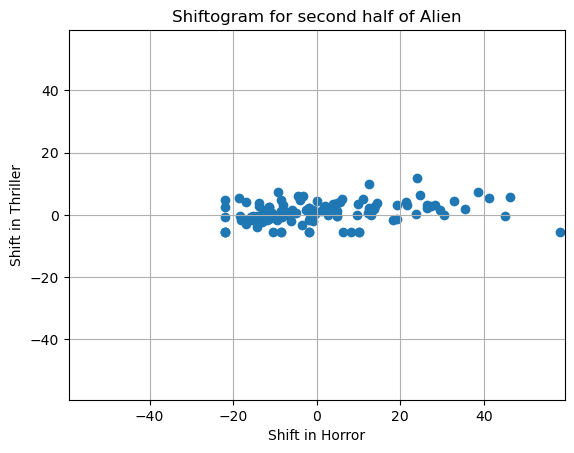

In [482]:
def shift_scatter2d(genre1, genre2):
    x = multiplot[genre1]
    y = multiplot[genre2]
    if np.max(x) >= np.max(y):
        max_value = np.max(x)
    elif np.max(x) < np.max(y):
        max_value = np.max(y)
    plt.scatter(x,y)
    plt.xlim(-1*max_value - 1, max_value + 1)
    plt.ylim(-1*max_value - 1 , max_value + 1)
    plt.grid()
    plt.xlabel('Shift in ' + genre1)
    plt.ylabel('Shift in ' + genre2)
    plt.title('Shiftogram for second half of Alien')
    plt.show()

shift_scatter2d('Horror', 'Thriller')

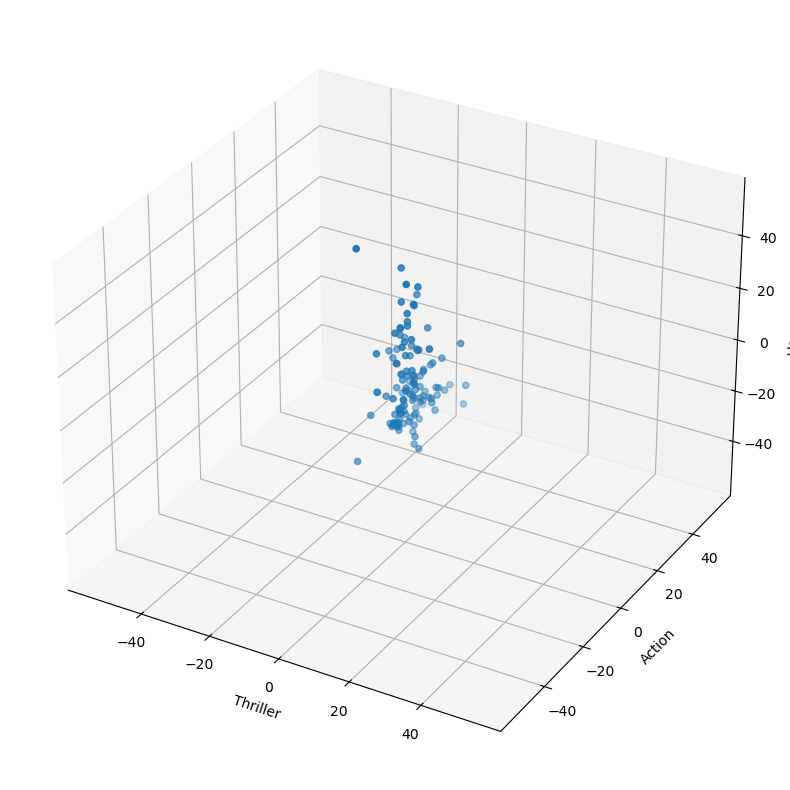

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
def shift_scatter3d(genre1, genre2, genre3):
    x = multiplot[genre1]
    y = multiplot[genre2]
    z = multiplot[genre3]
    max_values = [s.max() for s in [x, y, z]]
    max_value = max(max_values)
    fig = plt.figure(figsize=(11,10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlim(-1*max_value - 1, max_value + 1)
    ax.set_ylim(-1*max_value - 1, max_value + 1)
    ax.set_zlim(-1*max_value - 1, max_value + 1)
    ax.set_xlabel(genre1)
    ax.set_ylabel(genre2)
    ax.set_zlabel(genre3)
    plt.show()

shift_scatter3d(genres4comp[0], genres4comp[1], genres4comp[2] )

['Thriller', 'Action', 'Horror']


[0.1756873412685947, 0.3734268690368944, 0.2723703310537813]